# Проект: проверить ряд гипотез по увеличению выручки интернет-магазина

<br>Задача:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

<br>План:
1. Загрузить данные:
    - Считать csv фаилы с данными и сохранить их датафреймы
    - Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме.
2. Провести предобработку данных:
    - Проверить форматы данных в датасетах
    - Проверить все ли данные относятся к одному периоду
    - Отредактировать названия столбцов(при необходимости)
    - Проверить данные на явные дупликаты
3. Провести приотизацию гипотез:
    - Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    - Приментьи фреймворк RICE для приоритизации гипотез. Отсортировтьи их по убыванию приоритет.
4. Анализ А/В-теста:
    - Построить график кумулятивной выручки по группам
    - Построить график кумулятивного среднего чека по группам
    - Построить график относительного изменения кумулятивного среднего чека группы B к группе A
    - Построить график кумулятивного среднего количества заказов на посетителя по группам
    - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
    - Построить точечный график количества заказов по пользователям
    - Посчитать 95-й и 99-й перцентили количества заказов на пользователя
    - Построить точечный график стоимостей заказов
    - Посчитать 95-й и 99-й перцентили стоимости заказов
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
    - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
7. Сделать общий вывод
    
</div>

## 1 Загрузка данных

In [4]:
# добавим необходимые библиотеки
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
# загрузим данные из фаилов
hypothesis = pd.read_csv('/music/Practicum_projects/ICE_prioritization/datasets/hypothesis.csv')
orders = pd.read_csv('/music/Practicum_projects/ICE_prioritization/datasets/orders.csv')
visitors = pd.read_csv('/music/Practicum_projects/ICE_prioritization/datasets/visitors.csv')

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
# выгрузим полный текст гипотез
pd.options.display.max_colwidth = 110
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
orders.head(20)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Мы загрузили данные из трех фаилов. Пропуски в данных остуствуют. Названия столбцов в датасете hypothesis и orders нужно отредактировать. У некоторых столбцов нужно пометь тип данных.

## 2 Предобработка данных

In [14]:
# поменяем формат столбца date на дату
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [15]:
# проверим все ли даты в датасете orders относятся к 2019 году
if (orders['date'].dt.year == 2019).all():
    print("Все даты относятся к 2019 году")
else:
    print("Есть даты, которые не относятся к 2019 году")

Все даты относятся к 2019 году


In [16]:
# проверим все ли даты в датасете visitors относятся к 2019 году
if (visitors['date'].dt.year == 2019).all():
    print("Все даты относятся к 2019 году")
else:
    print("Есть даты, которые не относятся к 2019 году")

Все даты относятся к 2019 году


In [17]:
# поменяем заглавные буквы в названиях столбцов датасета hypothesis на строчные
hypothesis.columns = hypothesis.columns.str.lower() 

In [18]:
# отредактируем название столбцвов в датасете orders
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

In [19]:
# проверим датасет orders на явные дубликаты
orders.duplicated().sum()

0

In [20]:
# проверим датасет visitors на явные дубликаты
visitors.duplicated().sum()

0

In [21]:
# проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах
# группировка по visitor_id и проверка количества уникальных значений в group
duplicates = orders.groupby(['visitor_id'])['group'].nunique() > 1

# получение списка visitor_id, которые встречаются в разных группах
problematic_visitors = duplicates[duplicates].index.tolist()
print(problematic_visitors)

[8300375, 199603092, 232979603, 237748145, 276558944, 351125977, 393266494, 457167155, 471551937, 477780734, 818047933, 963407295, 1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004, 1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690, 2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274, 2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433, 2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277, 3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274, 3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402, 4120364173, 4186807279, 4256040402, 4266935830]


In [22]:
# посчитаем всех пользователей 
unique_visitor_count = orders['visitor_id'].nunique()

In [23]:
print('Количество пользователей, оказавшихся в обеих группах:',len(problematic_visitors))
print('Всего пользователей:',unique_visitor_count)

Количество пользователей, оказавшихся в обеих группах: 58
Всего пользователей: 1031


58(5.6% от общего числа пользователей) проблемных пользователей. Всего в таблице 1031 пользоватей. Так как их процент от общего числа не велик, очистим таблицу от этих пользователей, для корретного А/В теста.

In [25]:
orders = orders.query('visitor_id not in @problematic_visitors')
print('Отфильторованные данные:', orders['visitor_id'].nunique())

Отфильторованные данные: 973


Во время предобработки данных:
   - Был изменён формат столбца date с object на дату в датафрейме orders и visitors
   - Мы проверили что все данные относятся к одному периоду
   - Мы плменяли заглавные буквы в названиях столбцов датасета hypothesis на строчные
   - Были отредактированны названия столбцвов в датасете orders
   - Мы проверили датасеты orders и visitors на наличие явных дубликатов. Явные дупликаты отсуствуют
   - Мы удалили 58 пользователей(5.6% от общего числа) пользователей, которые оказались одновременно в обеих группах

## 3 Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [29]:
# Расчет коэффициента ICE
hypothesis['ice_score'] = round(
    (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 1
)

# Сортировка по убыванию приоритета
sorted_hypotheses = hypothesis[
    ['hypothesis', 'ice_score']
].sort_values(by='ice_score', ascending=False)

sorted_hypotheses

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [31]:
# Расчет коэффициента RICE
hypothesis['rice_score'] = hypothesis['ice_score'] * hypothesis['reach'] 

# Сортировка по убыванию приоритета
sorted_hypotheses2 = hypothesis[
    ['hypothesis', 'rice_score']
].sort_values(by='rice_score', ascending=False)

sorted_hypotheses2

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.9
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


7-я гипотеза перешла на 1-е место благодаря высокому значению переменной reach(10). 8-я гипотеза наоборот с первого места перешла на 5-е, так как у нее значение показателя reach всего 3.

## 4 Анализ A/B-теста

### Построем график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [35]:
# Создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[["date", "group"]].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "transaction_id": "nunique", "visitor_id": "nunique", "revenue": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])

# Объединяем кумулятивные данные в одной таблице и присваиваем ей столбцам понятные названия
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=["date", "group"], right_on=["date", "group"]
)
cumulative_data.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

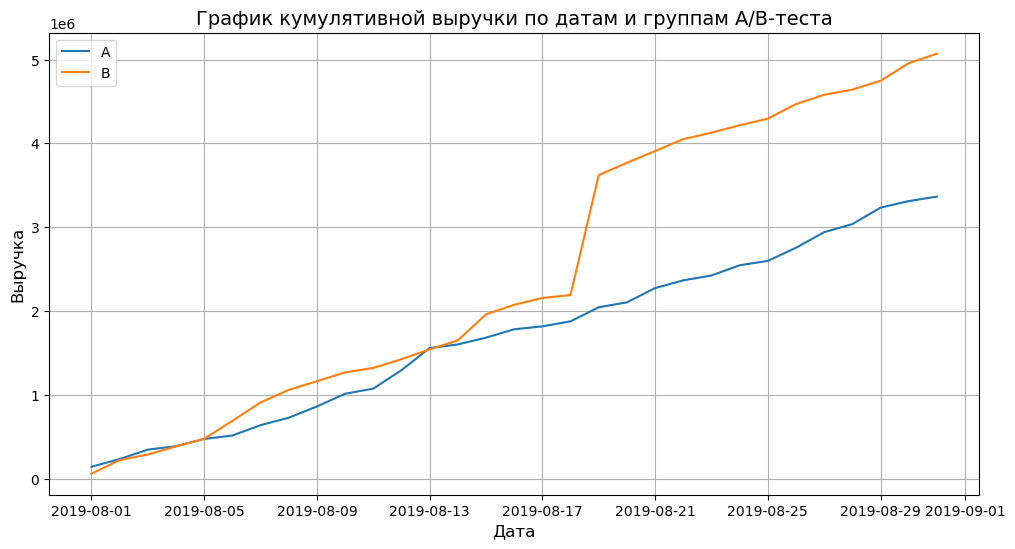

In [37]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Устанавливаем размер графика
fig, ax = plt.subplots(figsize=(12, 6))  

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы В
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('График кумулятивной выручки по датам и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.legend() 
plt.show()

Выручка в обоих группах равномерно растет. Есть резкий рост выручки в группе B в середине графика. Нужно исследовать причину этого резкого роста. Либо резко выросли продажи, либо маржинальность.

### Построем график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

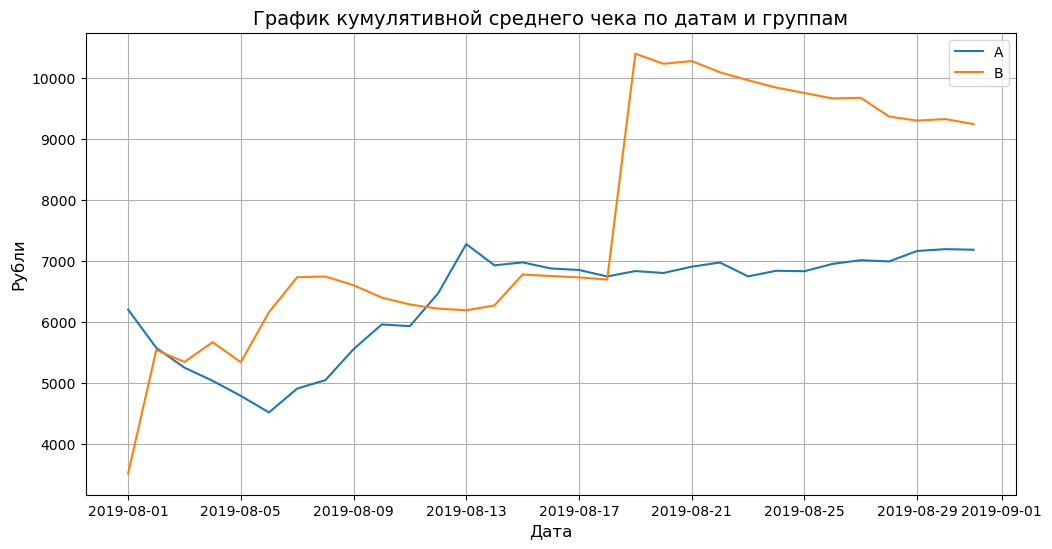

In [40]:
plt.figure(figsize=(12, 6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('График кумулятивной среднего чека по датам и группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Рубли', fontsize=12)
plt.legend() 
plt.show()

График отвечает на вопрос предыдущего графика. Причина роста выручки в группе B - резкий рост среднего чека.

### Построем график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

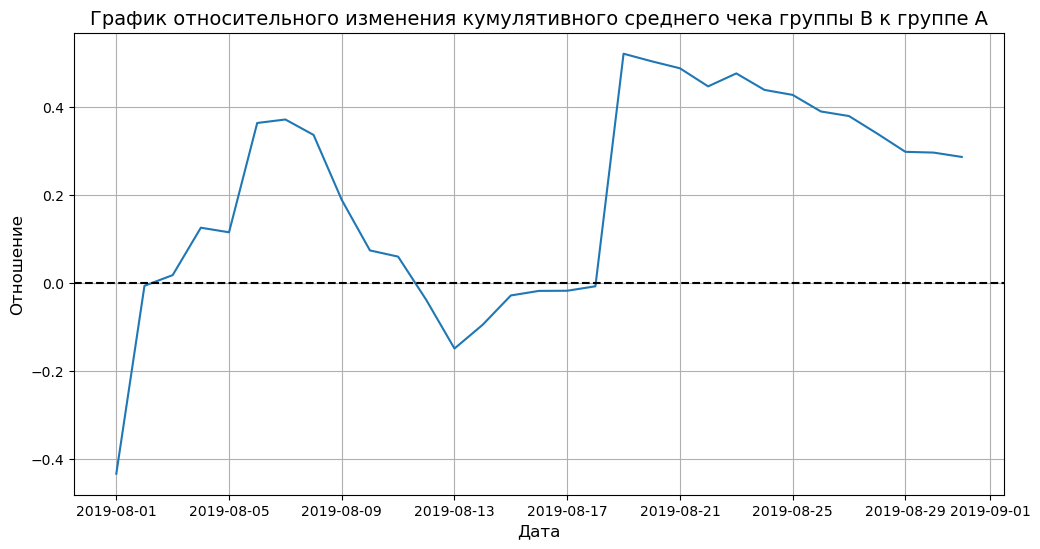

In [43]:
# собираем данные в одном датафрейме
merged_сumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(merged_сumulative_revenue['date'], (merged_сumulative_revenue['revenueB']/merged_сumulative_revenue['ordersB'])/(merged_сumulative_revenue['revenueA']/merged_сumulative_revenue['ordersA'])-1)

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение', fontsize=12)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

В нескольких точках график различия между группами резко отличается. Похоже на наличие больших заказов.

### Построем график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

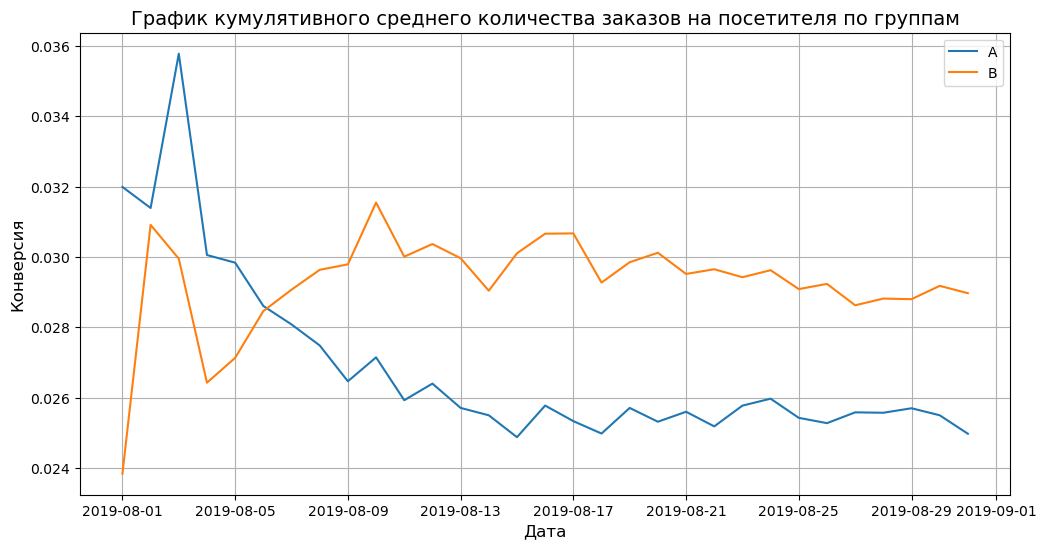

In [46]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']



# строим графики
plt.figure(figsize=(12, 6))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.grid(visible=True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.legend()
plt.show()


Сначала обе группы демонстрировали схожие показатели конверсии, однако со временем конверсия группы B стала увеличиваться и впоследствии установилась на новом уровне, тогда как конверсия группы A упала по сравнению с начальными значениями и также стабилизировалась.

### Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

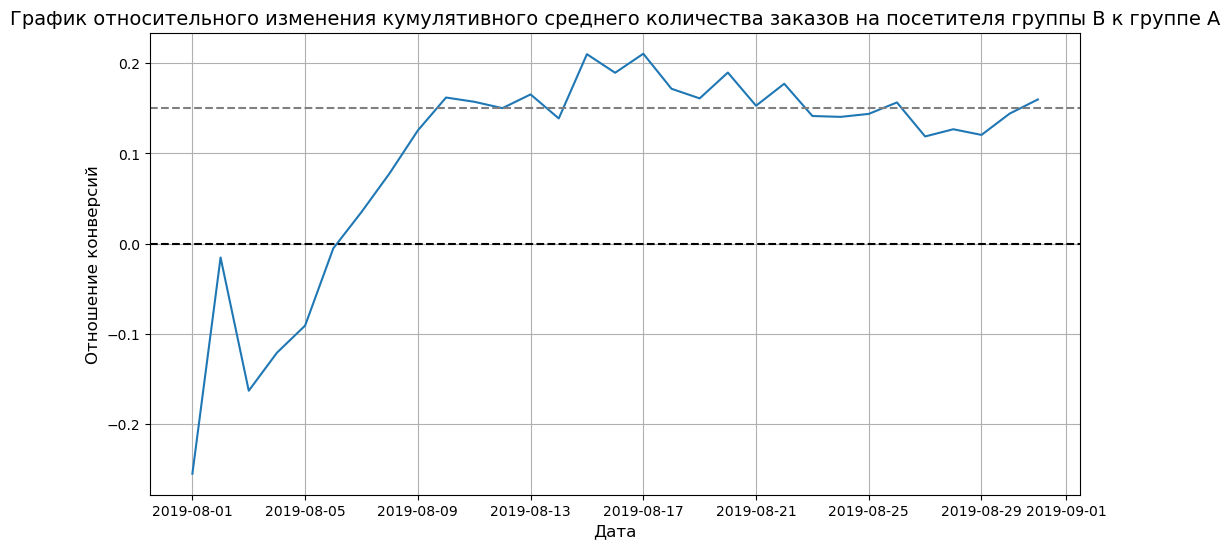

In [49]:
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики

plt.figure(figsize=(12, 6))
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
#plt.legend()
plt.show()

На графике видна высокая волатильность. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось. В конце снова начало расти.

### Построем точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [52]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем средний пользователь.

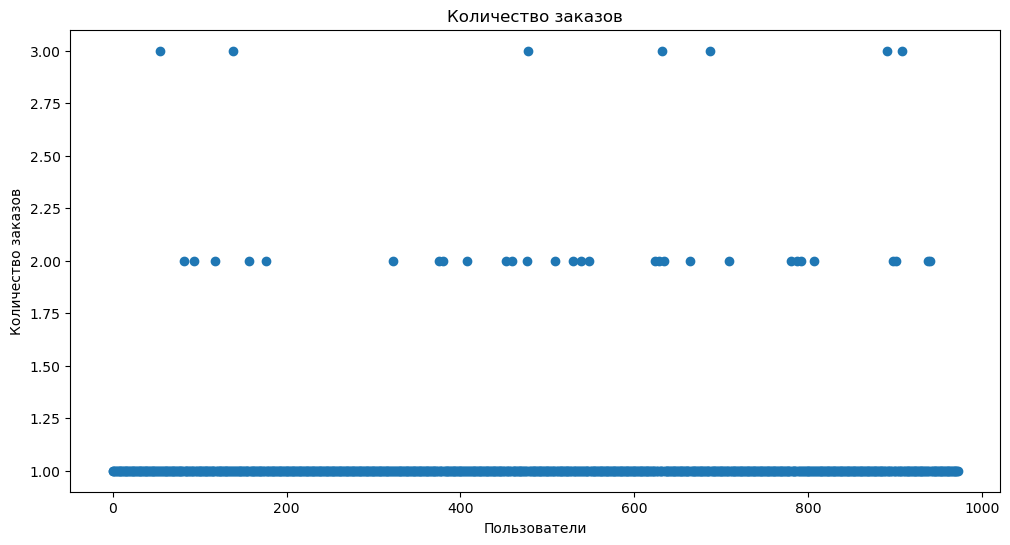

In [54]:
# создаем фигуру с заданным размером
plt.figure(figsize=(12, 6))

# генерируем значения для оси X
x_values = pd.Series(range(0, len(orders_by_users)))

# строим диаграмму рассеяния
plt.scatter(x_values, orders_by_users['orders'])

# добавляем заголовок графика
plt.title('Количество заказов')

# добавляем подпись оси X
plt.xlabel('Пользователи')

# добавляем подпись оси Y
plt.ylabel('Количество заказов')

# отображаем график
plt.show()

Есть определенной количество пользователей с 2-3 заказами. Их доля не ясна. Нужно провести дополнительно исследование чтобы убедиться что это не выбросы.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [57]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 1. 2.]


Не более 5% пользователей оформляли больше 2 заказов. И 10% пользователей заказывали более одного заказа. 

Выбирем 3 заказа на одного пользователя за верхнюю границу и отсеим аномальных пользователей по ней.

### Построем точечный график стоимостей заказов. Сделаем выводы и предположения.

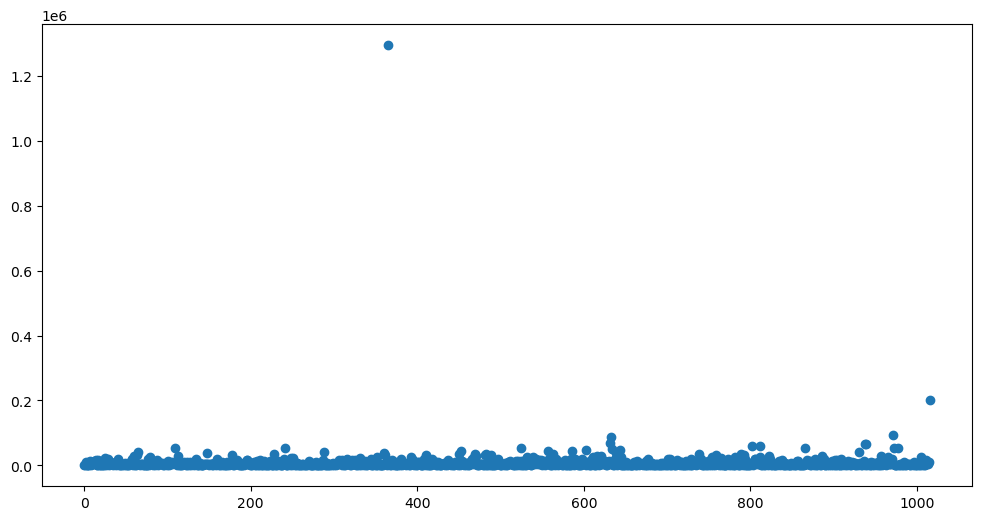

In [60]:
plt.figure(figsize=(12, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

Есть два выброса. Установим лимит в 100 тысяч.

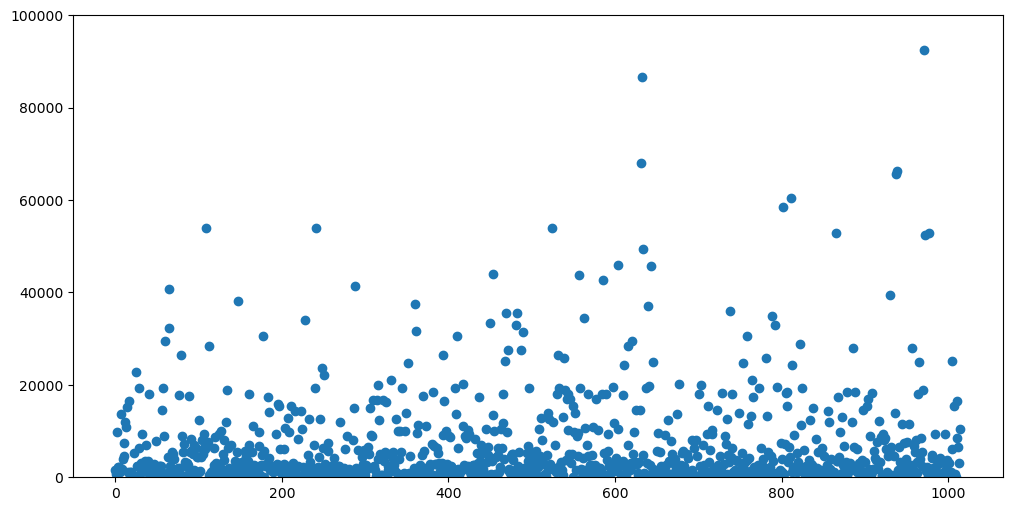

In [62]:
plt.figure(figsize=(12, 6))
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue'])
plt.show()

Основная часть значений меньше либо равно 20 тысячам. Тем не менее, нужно провести дополнительные исследования для того чтобы определить границу аномальных значений.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [65]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


5% заказов дороже 28 тысяч. 1% заказов дороже 58 тысяч. За верхнюю границу возьмем стоимость заказов в 28 тысяч.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

- Нулевая гипотеза: различий в среднем числе заказов между группами нет по "сырым" данным
- Альтернативня гипотеза: есть различие в среднем числе заказов между группами

In [69]:
# создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']

orders_by_visitors_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_visitors_a.columns = ['visitor_id', 'orders']

orders_by_visitors_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_visitors_b.columns = ['visitor_id', 'orders']

In [70]:
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать кол-во заказов
sample_a = pd.concat(
    [
        orders_by_visitors_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)

sample_b = pd.concat(
    [
        orders_by_visitors_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)

In [71]:
# Применяем критерий Манна-Уитни и форматируем p-value, округляя его до трех знаков после запятой.
# Выводим относительный прирост среднего числа заказов группы B.

alpha = 0.05

result_one = stats.mannwhitneyu(sample_a, sample_b)
print(f'p-value: {result_one.pvalue:.3f}')

if result_one.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: "Статистически значимых различий в среднем числе заказов между группами по "сырым данным" нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Статистически значимых различий в конверсии между группами нет".')

p-value: 0.011
Отвергаем нулевую гипотезу: "Статистически значимых различий в среднем числе заказов между группами по "сырым данным" нет".


In [72]:
print("Относительный прирост конверсии: {0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

Относительный прирост конверсии: 0.160


Статистически значимое различие в конверсии "по сырым" данным между группами есть. Группа B лучше. Разница составляет 16.0%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- Нулевая гипотеза: различий в среднем чеке между группами по "сырым данным" нет 
- Альтернативня гипотеза: есть различие в среднем чеке между группами

In [76]:
result_two = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value: {:.3f}'.format(result_two))
if result_two < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")  

p-value: 0.829
Не удалось отвергнуть нулевую гипотезу


In [77]:
print('Относительное различие в среднем чеке между группами:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительное различие в среднем чеке между группами:0.287


Статистически значимого различия в средних чеках по "сырым" данным нет, несмотря на разницу общего среднего значения по группам, которая составила 28.7%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

- Нулевая гипотеза: различий в среднем числе заказов по "очищенным" данным между группами нет 
- Альтернативня гипотеза: есть различие в среднем числе заказов между группами

In [81]:
# вначале посчитаем аномально большие по количеству и стоимости заказы
visitors_with_many_orders = pd.concat(
    [
        orders_by_visitors_a[orders_by_visitors_a['orders'] > 3]['visitor_id'],
        orders_by_visitors_b[orders_by_visitors_b['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)

visitors_with_expensive_orders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], 95))]['visitor_id']

abnormal_visitors = (
    pd.concat([visitors_with_many_orders, visitors_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_visitors.head(5))

print(len(abnormal_visitors))

568     113298937
1099    148427295
928     204675465
684     358944393
648     382846391
Name: visitor_id, dtype: int64
51


In [82]:
# очистим данные от этих выбросов чтобы понять как они могут повлиять на результаты исследования

sample_a_filtered = pd.concat(
    [
        orders_by_visitors_a[
            np.logical_not(orders_by_visitors_a['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_visitors_b[
            np.logical_not(orders_by_visitors_b['visitor_id'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [83]:
# применим статистический критерий Манна-Уитни к полученным выборкам:

result_three = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print('p-value: {:.3f}'.format(result_three))
if result_three < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-value: 0.017
Отвергаем нулевую гипотезу


In [84]:
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

0.156


Статистически значимое различие в конверсии "по очищенным" данным между группами есть. Разница составляет 15.6%. Таким образом, результаты теста не изменились. Выбросы не влияют на результат. Группа B лучше.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

- Нулевая гипотеза: различий в среднем чеке между группами по "очищенным" данным нет 
- Альтернативня гипотеза: есть различие в среднем чеке между группами

In [88]:
result_four = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
        )[1]

print('p-value: {:.3f}'.format(result_four))
if result_four < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-value: 0.741
Не получилось отвергнуть нулевую гипотезу


In [89]:
print(
    "Различие в средней конверсии группы В к А по «очищенным» данным:{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Различие в средней конверсии группы В к А по «очищенным» данным:-0.053


Статистически значимого различия в среднем чеке по "очищенным" данным нет. При этом, разница общего среднего значения по группам, сократилась и составила 5.3%(изначально она составляла 28.7%).

### Примим решение по результатам теста и объясним его.
Как мы выяснили выше различий в среднем чеке как в "сырых", так и в "очищенных" данных нет. При этом, есть различие в конверсии. В "сырых" данных конверсия в группе B выше конверсии в группе A на 16.0%. В "очищенных" данных конверсия в группе B выше конверсии в группе А на 15.6%. Таким образом, победила группа B.

## 5 Общий вывод

1. Были получены три фаила с данными о пользователях, заказах и гипотезах:
    - После загрузки данных, была изучена общая информация в каждом датафрейме
    - Пропуски в данных остуствовали
    - Необходимо было отредактировать названия столбцов
    - У некоторых столбцов необходимо было пометь тип данных
2. Проведена предобработка данных:
    - Был изменён формат столбца date с object на дату в датафрейме orders и visitors
    - Мы проверили что все данные относятся к одному периоду
    - Мы поменяли заглавные буквы в названиях столбцов датасета hypothesis на строчные
    - Были отредактированны названия столбцвов в датасете orders
    - Мы проверили датасеты orders и visitors на наличие явных дубликатов. Явные дупликаты отсуствуют
    - Мы удалили 58 пользователей(5.6% от общего числа) пользователей, которые оказались одновременно в обеих группах
3. Провели приотизацию гипотез:
    - Применили фреймворк ICE для приоритизации гипотез. Отсортировали их по убыванию приоритета.
    - Применили фреймворк RICE для приоритизации гипотез. Отсортировали их по убыванию приоритета.
    - 7-я гипотеза перешла на 1-е место благодаря высокому значению переменной reach(10). 8-я гипотеза наоборот с первого места перешла на 5-е, так как у нее значение показателя reach всего 3.
4. Анализ A/B-теста:
    - Построили график кумулятивной выручки по группам. Выручка в обоих группах равномерно растет. Есть резкий рост выручки в группе B в середине графика. Решили исследовать причину этого резкого роста. 
    - Построили график кумулятивного среднего чека по группам. График отвечает на вопрос предыдущего графика. Причина роста выручки в группе B - резкий рост среднего чека.
    - Построили график относительного изменения кумулятивного среднего чека группы B к группе A. В нескольких точках график различия между группами резко отличается.
    - Построили график кумулятивного среднего количества заказов на посетителя по группам. Сначала обе группы демонстрировали схожие показатели конверсии, однако со временем конверсия группы B стала увеличиваться и впоследствии установилась на новом уровне, тогда как конверсия группы A упала по сравнению с начальными значениями и также стабилизировалась.
    - Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. На графике видна высокая волатильность. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом среднее количество заказов на посетителя для группы B снова уменьшалось. В конце снова начало расти.
    - Построили точечный график количества заказов по пользователям. Есть определеннопе количество пользователей с 2-3 заказами. Их доля не ясна. Решили провести дополнительное исследование чтобы убедиться что это не выбросы.
    - Посчитали 95-й и 99-й перцентили количества заказов на пользователя. Не более 5% пользователей оформляли больше 2 заказов. И 10% пользователей заказывали более одного заказа. Выбрали 3 заказа на одного пользователя за верхнюю границу и отсеили аномальных пользователей по ней.
    - Построили точечный график стоимостей заказов. Основная часть значений меньше либо равно 20 тысячам. Решили провести дополнительные исследования для того чтобы определить границу аномальных значений.
    - Посчитали 95-й и 99-й перцентили стоимости заказов. 5% заказов дороже 28 тысяч. 1% заказов дороже 58 тысяч. За верхнюю границу взяли стоимость заказов в 28 тысяч.
    - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Статистически значимое различие в конверсии "по сырым" данным между группами есть. Разница составляет 16.0%
    - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Статистически значимого различия в средних чеках по "сырым" данным нет, несмотря на разницу общего среднего значения по группам, которая составила 28.7%
    - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Статистически значимое различие в конверсии "по очищенным" данным между группами есть. Разница составляет 15.6%. Таким образом, результаты теста не изменились. Выбросы не влияют на результат.
    - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Статистически значимого различия в среднем чеке по "очищенным" данным нет. При этом, разница общего среднего значения по группам, сократилась и составила 5.3%(изначально она составляла 28.7%).
    - Как мы выяснили выше различий в среднем чеке как в "сырых", так и в "очищенных" данных нет. При этом, есть различие в конверсии. В "сырых" данных конверсия в группе B выше конверсии в группе A на 16.0%. В "очищенных" данных конверсия в группе B выше конверсии в группе А на 15.6%. Таким образом, победила группа B.
    